# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Oktavianinda Kusumadewi
- **Email:** oktavianinda928@gmail.com
- **ID Dicoding:** oktavianinda_kusumadewi

## Menentukan Pertanyaan Bisnis

- Apakah perubahan musim berdampak pada persewaan sepeda?
- Bagaimana perbandingan perkembangan rental selama periode 2011 hingga 2012?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Oktavianinda/Proyek_akhir_dicoding/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


hasil kode diatas menampilkan hasil 4 baris pertama pada tabel hour.csv

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Oktavianinda/Proyek_akhir_dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


kode diatas menampilkan 4 baris pertama dari tabel day.csv

### Assessing Data

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pada hasil diatas menunjukkan tidak terdapat duplikasi pada hour_df.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


pada tabel tersebut terdapat perbedaan pada dteday dengan data type object. Tipe data object harusnya digunakan untuk tipe data string dan dteday harusnya memiliki tipe data datetime.

In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak ditemukan missing value pada hour_df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada day_df memiliki keanehan yang sama dengan hour_df yaitu Dype pada dteday harusnya direpresentasikan drngan tipe data datetime

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value pada day_df

In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Hasil tersebut menunjukkan tidak ada duplikasi pada day_df.

### Cleaning Data

In [ ]:
day_df.season.value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

Dari hasil diatas musim yang paling lama durasinya adalah musim Fall atau musim gugur.

In [ ]:
day_df.weathersit.value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

Pada hasil diatas menunjukkan cuaca yang paling dominan dalam 2 tahun adalah 1 yaitu Clear, Few clouds, partly cloudy.

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
datetime_coloumns = ["dteday"]

for coloumn in datetime_coloumns:
  day_df[coloumn] = pd.to_datetime(day_df[coloumn])

Pada tahap ini merubah tipe data pada kolom dteday yang awalnya berupa object menjadi datetime.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Dtype pada kolom dteday telah berubah menjadi datetime

In [ ]:
datetime_coloumns = ["dteday"]

for coloumn in datetime_coloumns:
  hour_df[coloumn] = pd.to_datetime(hour_df[coloumn])

merubah tipe data dteday pada hour_df menjadi tipe data datetime.

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

tipe data pada kolom dteday telah berubah menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
season_anls = day_df.iloc[:,[2,13,14,15]]
season_anls

,season,casual,registered,cnt
0,1,331,654,985
1,1,131,670,801
2,1,120,1229,1349
3,1,108,1454,1562
4,1,82,1518,1600
...,...,...,...,...
726,1,247,1867,2114
727,1,644,2451,3095
728,1,159,1182,1341
729,1,364,1432,1796


In [ ]:
musim=['springer', 'summer', 'fall', 'winter']

In [ ]:
season_anls['season']=season_anls['season'].replace([1,2,3,4],musim)

In [ ]:
season_anls

,season,casual,registered,cnt
0,springer,331,654,985
1,springer,131,670,801
2,springer,120,1229,1349
3,springer,108,1454,1562
4,springer,82,1518,1600
...,...,...,...,...
726,springer,247,1867,2114
727,springer,644,2451,3095
728,springer,159,1182,1341
729,springer,364,1432,1796


from matplotlib import pyplot as plt
season_anls['casual'].plot(kind='hist', bins=20, title='casual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
season_anls['registered'].plot(kind='hist', bins=20, title='registered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
season_anls['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
season_anls.groupby('season').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
season_anls.plot(kind='scatter', x='casual', y='registered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
season_anls.plot(kind='scatter', x='registered', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
season_anls['casual'].plot(kind='line', figsize=(8, 4), title='casual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
season_anls['registered'].plot(kind='line', figsize=(8, 4), title='registered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
season_anls['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(season_anls['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(season_anls, x='casual', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(season_anls['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(season_anls, x='registered', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(season_anls['season'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(season_anls, x='cnt', y='season', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Mengubah isi pada kolom 'season' yang awalnya 1, 2, 3, 4 menjadi 'springer', 'summer', 'fall', 'winter'

In [ ]:
season_anls.groupby('season').sum()

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
springer,60622,410726,471348
summer,203522,715067,918589
winter,129782,711831,841613


from matplotlib import pyplot as plt
_df_8['casual'].plot(kind='hist', bins=20, title='casual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['registered'].plot(kind='hist', bins=20, title='registered')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cnt'].plot(kind='hist', bins=20, title='cnt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='casual', y='registered', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='registered', y='cnt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['casual'].plot(kind='line', figsize=(8, 4), title='casual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['registered'].plot(kind='line', figsize=(8, 4), title='registered')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['cnt'].plot(kind='line', figsize=(8, 4), title='cnt')
plt.gca().spines[['top', 'right']].set_visible(False)

tabel diatas menampilkan total casual users dan registered users pada tiap musim. Musim 'Fall' adalah musim yang paling banyak diminati untuk merental sepeda.

In [ ]:
year_anls = day_df.iloc[:,[1, 3]]
year_anls

,dteday,yr
0,2011-01-01,0
1,2011-01-02,0
2,2011-01-03,0
3,2011-01-04,0
4,2011-01-05,0
...,...,...
726,2012-12-27,1
727,2012-12-28,1
728,2012-12-29,1
729,2012-12-30,1


In [ ]:
tahun = [2011, 2012]

In [ ]:
year_anls['yr']=year_anls['yr'].replace([0, 1],tahun)

In [ ]:
year_anls

,dteday,yr
0,2011-01-01,2011
1,2011-01-02,2011
2,2011-01-03,2011
3,2011-01-04,2011
4,2011-01-05,2011
...,...,...
726,2012-12-27,2012
727,2012-12-28,2012
728,2012-12-29,2012
729,2012-12-30,2012


Mengubah nilai dari kolom 'yr' yang awalnya berisi 0 dan 1 menjadi 2011 & 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1:Apakah perubahan cuaca berdampak pada persewaan sepeda?

In [ ]:
season_anls_result = season_anls.groupby('season').sum()

<Axes: xlabel='season'>

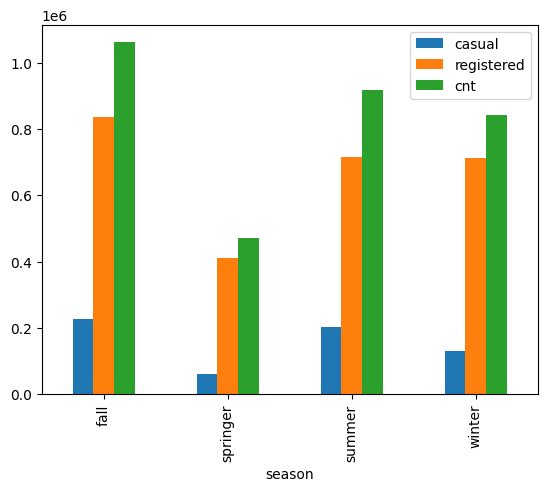

In [ ]:
season_anls_result.plot.bar()

### Pertanyaan 2: Bagaimana perbandingan perkembangan rental selama periode 2011 hingga 2012?

<ipython-input-271-9f013da7df49>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-271-9f013da7df49>:4: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


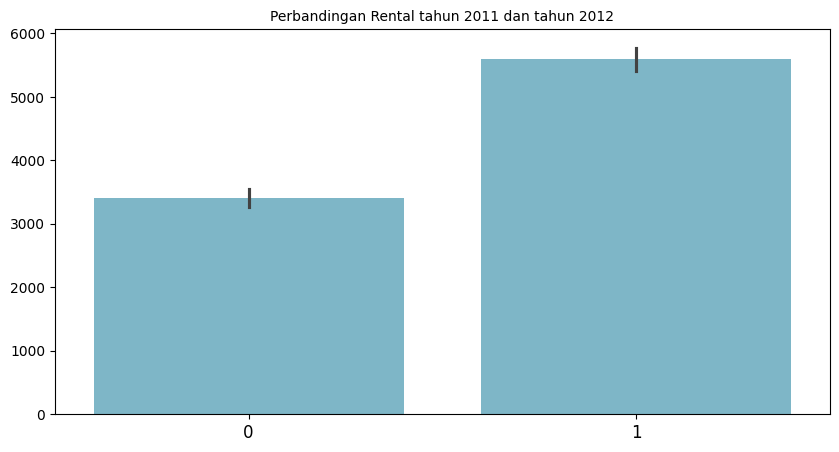

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD3"]

sns.barplot(
    y="cnt",
    x="yr",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette=colors_
)
plt.title("Perbandingan Rental tahun 2011 dan tahun 2012", loc="center", fontsize=10)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

- Dari hasil visualisasi pengguna rental sepeda tertinggi terdapa pada musim 'Fall' atau musim gugur. Sedangkan pada musim 'Springer' mengalami penurunan tingkat perental yang cukup signifikan.
- Berdasarkan hasil visualisasi dapat dilihat terdapat perbandingan yang cukup signifikan dari tahun 2011 dengan 2012, pada tahun 2012 terjadi kenaikan jumlah perental dibandingkan tahun 2011

##Export Dataset

In [ ]:
day_df.to_csv("main_data.csv", index=False)